# Analysis of Audio Data from Cattle

### Collaboration with University of Wisconsin - Madison 
### Animal Sciences Department
#### Yalda Zare, December 2018

Input: Audio data were collected from grazing beef cattle at different times. Microphones were installed on the neck and the sound of activity (Grazing/Not-grazing/Ruminating) was recorded. 

Sensor technology for animal farming, like IoT technology in connected devices in our daily life, has gained lots of attention in recent years. Therefore, developng analytic capability and statistical methodologies to make actionable insight from this kind of data is necessary and will be an inevitable need in the near future.

Three animals were recorded from 2016-09-27 to 2016-09-29 and 2016-10-03 to 2016-10-05.
Two additional animals were recorded only from 2016-10-03 to 2016-10-05. 

The raw data were processed by an Animal Scientist who listened to the generated audio and caregorized the cattle behavior to grazing, not-grazing or ruminating in intervals of 6 minutes. This categorization was done based on a combination of domain expertise and learning from the sounds by listening to them.

The rumen pH was also measured via "bouts" containing a pH sensor which were swallen by the animal. The bouts remained in the animals' rumens throughout the experiment.

There are from 910 to 1352 data points (observations) for 5 animals.

Objectives: 
1- Investigate methods to analyze time series data from sensor technology
2- Is there any relationship between rumen pH and the state of grazing/not grazing 
3- If grazing decreases or increases pH, how long does it take for this to effect


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import datetime
from pandas import Series
from matplotlib import pyplot as plt
import seaborn as sns

# Read and clean the data

In [2]:
#Read the first file
path = "/Users/yaldazare/Desktop/DataScience/Sound_Analysis"
dat = pd.read_excel(path + "/Exp3Fall2016 (1).xlsx")
dat.head()

,ID,Time,Date,Activity,Unnamed: 4,Number,pH,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,295,10:12:00,2016-10-03,Not Grazing,NaN,0,6.777180,NaN,Max,Min,Avg,SD
1,295,10:18:00,2016-10-03,Grazing,NaN,2,6.775878,NaN,7.17156,6.32428,6.69682,0.149059
2,295,10:24:00,2016-10-03,Grazing,NaN,2,6.729713,NaN,NaN,NaN,NaN,NaN
3,295,10:30:00,2016-10-03,Grazing,NaN,2,6.675391,NaN,NaN,NaN,NaN,NaN
4,295,10:36:00,2016-10-03,Grazing,4 wheeler,2,6.739344,NaN,NaN,NaN,NaN,NaN


In [3]:
#Extract columns 
dat = dat[dat.columns[0:7]]
dat.columns
#drop extra columns 
dat = dat.drop(['Unnamed: 4'], axis = 1)

In [4]:
dat.head()

,ID,Time,Date,Activity,Number,pH
0,295,10:12:00,2016-10-03,Not Grazing,0,6.777180
1,295,10:18:00,2016-10-03,Grazing,2,6.775878
2,295,10:24:00,2016-10-03,Grazing,2,6.729713
3,295,10:30:00,2016-10-03,Grazing,2,6.675391
4,295,10:36:00,2016-10-03,Grazing,2,6.739344


In [5]:
#Read second file (two Excel sheets)
dat2 = pd.read_excel(path + "/AllSteersBehavior.xlsx", 
                     sheet_name="Sept")
#print(dat2.head())
#dat2_295 = dat2[dat2['ID'] == 295]
#print(dat2_295.head())

dat3 = pd.read_excel(path + "/AllSteersBehavior.xlsx", 
                     sheet_name="Oct")
print('Dimention 1: {}'.format(dat2.shape))
print('Dimention 2: {}'.format(dat3.shape))

#Merge data from sheet 1 and 2
dat2_3 = pd.concat([dat2,dat3], axis=0)
print('Total Dimention: {}'.format(dat2_3.shape))
dat3.head()

Dimention 1: (1317, 6)
Dimention 2: (2275, 6)
Total Dimention: (3592, 6)


,ID,Time,Date,Activity,Behavior Number,pH
0,295,10:12:00,2016-10-03,Not Grazing,0,6.777180
1,295,10:18:00,2016-10-03,Grazing,2,6.775878
2,295,10:24:00,2016-10-03,Grazing,2,6.729713
3,295,10:30:00,2016-10-03,Grazing,2,6.675391
4,295,10:36:00,2016-10-03,Grazing,2,6.739344


In [6]:
#Unify column names between the two input files
dat2_3 = dat2_3.rename(columns= {'Behavior Number' : 'Number'})
dat2_3.head()

,ID,Time,Date,Activity,Number,pH
0,294,12:30:00,2016-09-27,Grazing,2,6.570701
1,294,12:36:00,2016-09-27,Grazing,2,6.461720
2,294,12:42:00,2016-09-27,Grazing,2,6.444091
3,294,12:48:00,2016-09-27,Grazing,2,6.444187
4,294,12:54:00,2016-09-27,Grazing,2,6.442919


In [7]:
#Merge data from file 1 and file 2
datAll = pd.concat([dat,dat2_3], axis=0)
#datAll.dtypes

#clean up Time columns, remove "1900-01-01" from some entries in the Time column
datAll['Time'] = pd.to_datetime(datAll['Time'].astype(str))
datAll['Time'] = datAll['Time'].dt.time

#convert "datetime" type in Date column to just date
datAll['Date'] = datAll['Date'].dt.date
#datAll.Date

#create a new DateTime combined object
datAll['DateTime'] = pd.to_datetime(datAll['Date'].apply(str)+' '+
                                    datAll['Time'].apply(str))
datAll.head()
#datAll.dtypes

,ID,Time,Date,Activity,Number,pH,DateTime
0,295,10:12:00,2016-10-03,Not Grazing,0,6.777180,2016-10-03 10:12:00
1,295,10:18:00,2016-10-03,Grazing,2,6.775878,2016-10-03 10:18:00
2,295,10:24:00,2016-10-03,Grazing,2,6.729713,2016-10-03 10:24:00
3,295,10:30:00,2016-10-03,Grazing,2,6.675391,2016-10-03 10:30:00
4,295,10:36:00,2016-10-03,Grazing,2,6.739344,2016-10-03 10:36:00


In [8]:
#Check the dimensions
print(dat.shape)
print(dat2_3.shape)
print(datAll.shape)


(2275, 6)
(3592, 6)
(5867, 7)


In [9]:
#Is the data balanced? Are there missing values?
#Get a table of counts by animal ID
datAll.groupby('ID').count()

,Time,Date,Activity,Number,pH,DateTime
ID,,,,,,
294,1345,1345,1345,1345,1345,1345
295,1351,1351,1351,1351,1351,1351
297,910,910,910,910,910,910
298,910,910,910,910,910,910
299,1351,1351,1351,1351,1351,1351


There is about the same amount of data recorded for animals 294, 295 and 299. Animals 297 and 298 have partial data.

In [10]:
#how many unique dates_ID combinations are in the data? 
#These shows the days the data were collected (microphone working 
#on the cellar) and missing data
pd.crosstab(datAll['Date'],datAll['ID'])  

ID,294,295,297,298,299
Date,,,,,
2016-09-27,115,116,0,0,115
2016-09-28,240,240,0,0,240
2016-09-29,80,85,0,0,86
2016-10-03,276,276,276,282,276
2016-10-04,480,480,480,480,480
2016-10-05,154,154,154,148,154


Animals 294, 295 and 299 had data on three dates (2016-09-27, 2016-09-28, 2016-09-29 and 2016-10-03) in September, and two dates in October 2016-10-04, 2016-10-05.
Animals 297, 298 had data on only three dates 2016-10-03, 2016-10-04 and 2016-10-05 in October 

In [11]:
#Find the first and last Time of recording for each animal in each day
temp = datAll

#Get the time when recording started, time when it ended and number 
#of data points by ID/Date
first = pd.DataFrame(temp.groupby(['ID','Date']).first())
first = first['Time']
last = temp.groupby(['ID','Date']).last()
last = last['Time']
counts = pd.DataFrame(temp.groupby(['ID','Date']).count())
counts = counts.Time

# A dataframe for starting time of recording, ending time of recording
#and number of data points in each category
first_last = pd.concat([first,last,counts], axis=1)
#rename columns
first_last.columns = ['Start', 'End', 'Counts']
first_last

Start       End  Counts
ID  Date                                  
294 2016-09-27  12:30:00  23:54:00     115
    2016-09-28  00:00:00  23:54:00     240
    2016-09-29  00:00:00  07:54:00      80
    2016-10-03  10:12:00  23:54:00     276
    2016-10-04  00:00:00  23:54:00     480
    2016-10-05  00:00:00  07:36:00     154
295 2016-09-27  12:30:00  00:00:00     116
    2016-09-28  00:06:00  00:00:00     240
    2016-09-29  00:06:00  08:30:00      85
    2016-10-03  10:12:00  23:54:00     276
    2016-10-04  00:00:00  23:54:00     480
    2016-10-05  00:00:00  07:36:00     154
297 2016-10-03  10:12:00  23:54:00     276
    2016-10-04  00:00:00  23:54:00     480
    2016-10-05  00:00:00  07:36:00     154
298 2016-10-03  10:12:00  00:12:00     282
    2016-10-04  00:18:00  00:12:00     480
    2016-10-05  00:18:00  07:36:00     148
299 2016-09-27  12:30:00  23:54:00     115
    2016-09-28  00:00:00  23:54:00     240
    2016-09-29  00:00:00  08:30:00      86
    2016-10-03  10:12:00  23:54:00     276
    2016-10-04  00:00:00  23:54:00     480
    2016-10-05  00:00:00  07:36:00     154

In [12]:
#Freq table for behaviour category (0 for not-grazing, 1 ruminating, 2 grazing)
datAll_tab = pd.crosstab(index=datAll["Number"],  columns="count")     
datAll_tab

col_0,count
Number,
0,1729
1,1874
2,2264


In [13]:
#Some checking and cleaning on the behaviour category

#'Not Grazing' and 'Not-Grazing' both exist in the data. convert 
#'Not Grazing' to 'Not-Grazing'
datAll['Activity'].replace({'Not Grazing':'Not-Grazing'},inplace=True)
datAll.groupby(['Activity']).mean()

#Combine Not-Grazing and ruminating into one category
datAll['Activity'].replace({'Ruminating':'Not-Grazing'},inplace=True)
datAll.groupby(['Activity']).mean()

#convert them to two groups in the "Number" column
datAll['Number'] = datAll['Activity'].apply({'Not-Grazing':0, 'Grazing':1}.get)
datAll_tab = pd.crosstab(index=datAll["Number"],  columns="count")     
datAll_tab

col_0,count
Number,
0,3601
1,2266


## Visualization of Patterns of change in PH

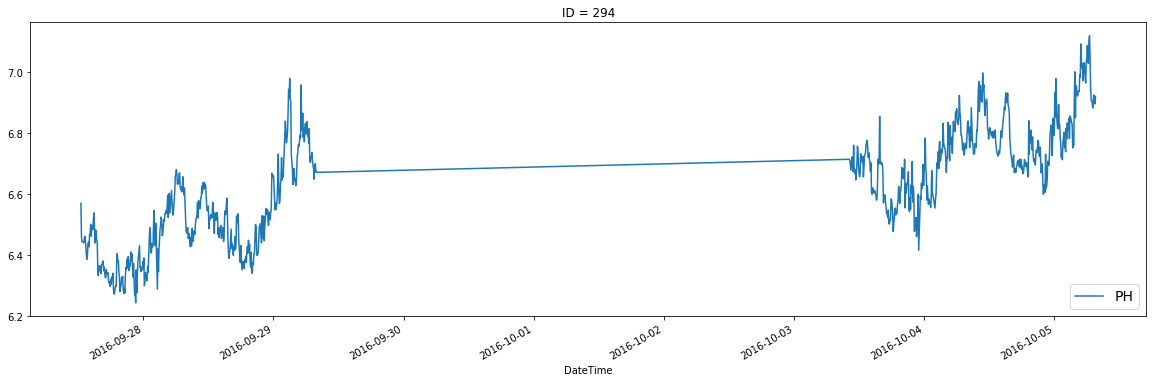

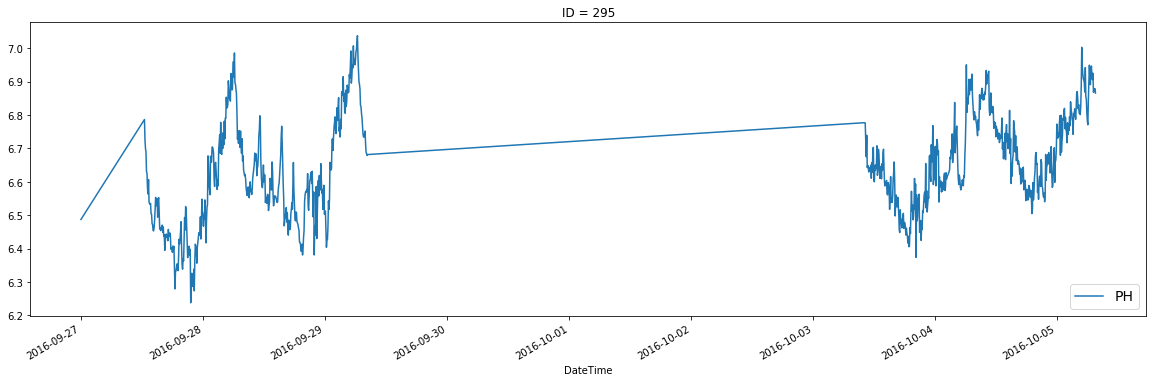

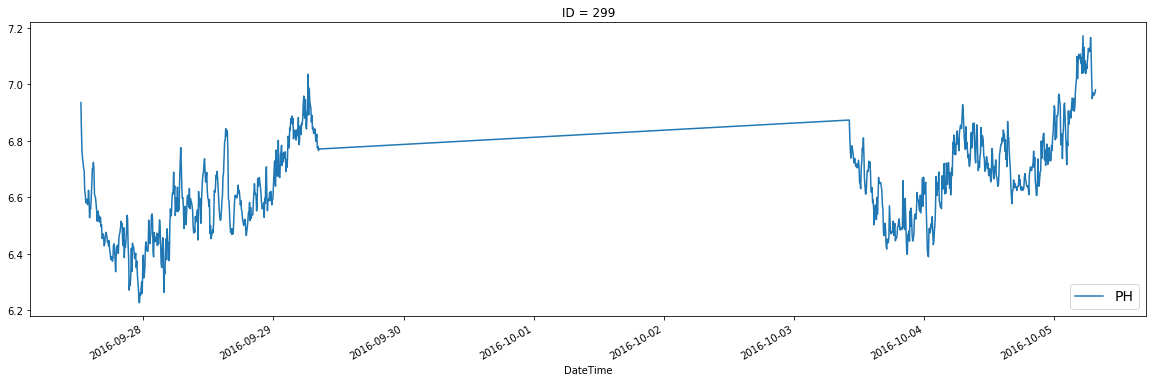

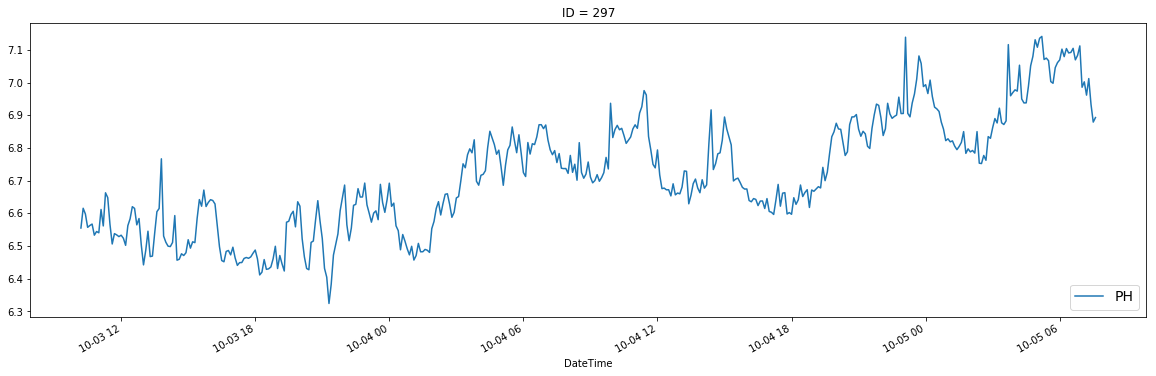

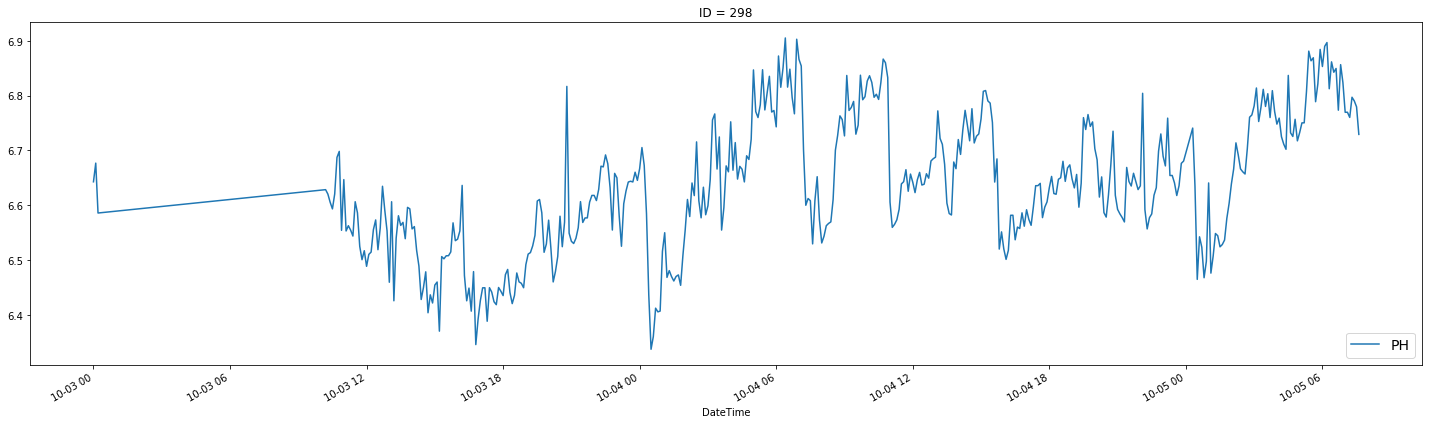

In [14]:
# Initial visualization of data: 
#create plots for pH changes over time in different animals
#(one plot for each animal for the ease of comparison)
datAll.index = datAll.DateTime

#create a Series objest
ts_294= Series(datAll.pH[datAll['ID'] ==294], 
               index = datAll[datAll['ID'] ==294].DateTime)
ts_294.plot(figsize=(20,6), title= "ID = 294", label="PH")
plt.legend(fontsize = 14, loc="lower right")

plt.figure()
ts_295= Series(datAll.pH[datAll['ID'] ==295], 
               index = datAll[datAll['ID'] ==295].DateTime)
ts_295.plot(figsize=(20,6), title= "ID = 295", label="PH")
plt.legend(fontsize = 14, loc="lower right")

plt.figure()
ts_299= Series(datAll.pH[datAll['ID'] ==299], 
               index = datAll[datAll['ID'] ==299].DateTime)
ts_299.plot(figsize=(20,6), title= "ID = 299", label="PH")
plt.legend(fontsize = 14, loc="lower right")

plt.figure()
ts_297= Series(datAll.pH[datAll['ID'] ==297], 
               index = datAll[datAll['ID'] ==297].DateTime)
ts_297.plot(figsize=(20,6), title= "ID = 297", label="PH")
plt.legend(fontsize = 14, loc="lower right")

plt.figure()
ts_298= Series(datAll.pH[datAll['ID'] ==298], 
               index = datAll[datAll['ID'] ==298].DateTime)
ts_298.plot(figsize=(20,6), title= "ID = 298", label="PH")
plt.legend(fontsize = 14, loc="lower right")
plt.tight_layout()

Patterns of change in the PH are similar for animals 294, 295, and 299 and for animals 297 and 298. Thpattenr is different among two groups.

The straight line in the plots shows the period between dates that there was no recording from 09/29 to 10/03.

# Investigating average PH by grazing activity

In [15]:
#mean ph by behaviour group (0= not grazing, 1= grazing)
mean_ph = pd.DataFrame(datAll.groupby(['Number']).pH.mean())
mean_ph

,pH
Number,
0,6.691034
1,6.629116


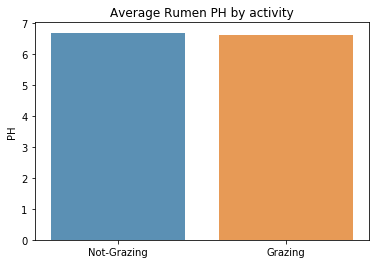

In [16]:
#barplots for mean ph
sns.barplot(x = ['Not-Grazing', 'Grazing'], y = 'pH',data=mean_ph, alpha = .8)
plt.title('Average Rumen PH by activity')
plt.ylabel('PH')
plt.show()

     Not_Grazing   Grazing
ID                        
294     6.683780  6.636666
295     6.667805  6.632088
297     6.773292  6.642663
298     6.676884  6.572052
299     6.680838  6.649691


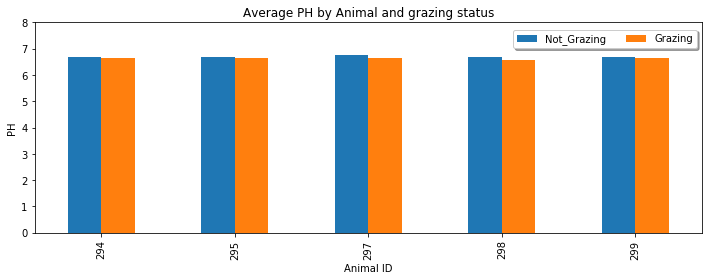

In [17]:
#Calculate mean PH by animal and behaviour (0/1) 0: Not grazing, 1: Grazing
mean_ph_id = pd.DataFrame(datAll.groupby(['Number','ID']).pH.mean())
mean_ph_id
#barplots for mean ph
temp = mean_ph_id.pH.unstack().T
temp.columns = ['Not_Grazing','Grazing']
print(temp)
temp.plot.bar(legend='', figsize =(10,4), ylim =(0,8))
plt.legend(loc = "upper right", bbox_to_anchor=(1, 0.99),ncol=2, 
           fancybox=True, shadow=True)
plt.xlabel('Animal ID',fontsize=10)
plt.ylabel('PH', fontsize=10)
plt.title('Average PH by Animal and grazing status')
plt.tight_layout()

The average PH by activity shows that animals have higher PH in non-grazing state and lower PH in the grazing state. This is true in the whole population (average PH by activity) and by animal (average PH by animal for grazing vs. non-grazing). 
It would be interesting to see when or how long after grazing activity the PH starts to decrease.



# Patterns of change in rumen PH in relation to grazing activity

## Rolling window Function
Windows identify sub periods of time series
<br>
- Calculate metrics for sub periods inside the window
<br>
- Create a new time series of metrics
<br>
There are two types of windows:
<br>
1- Rolling: same size, sliding 
<br>
2- Expanding: contain all prior values 

In [18]:
#Build windows over the data and calculate statistics to track PH change
temp = datAll[['pH','ID','Date','Number']]
temp.columns = ['pH','ID','Date','Grazing']

#create sepaarte datasets for 294, 295 and 299 (these animals have 
#similar recording dates). This is so the windows don't go over the other ID
temp_294 = temp[temp['ID'] == 294]
temp_295 = temp[temp['ID'] == 295]
temp_299 = temp[temp['ID'] == 299]

#create datasets for 297, 298 (these animals have similar recording dates)
temp_297 = temp[temp['ID'] == 297]
temp_298 = temp[temp['ID'] == 298]


### Window Size
I tested different window sizes from small numbers 5, 10, 50 to larger numbers 100, 200, 250. The window size of 100 seems to be optimal. Smaller windows don't create a smooth picture for change in grazing state, there will  be lots of  between 0 and 1 and the peaks are not clear. 

Window size of 100 means the window spans over 100 observations. Since the interval between every two observations in the same day is 6 minutes, 100 observations is equivalent to 600 minutes or 10 hours.

In [28]:
# a rolling window to go over ph and calculate only mean ph
mean_timeDiff =[]
animal_id = []

winsize = 100
#dat = temp_295
#roll = dat.pH.rolling(window=winsize).mean()
#roll['Date'], roll['Time'] = roll.index.str.split(' ', 1).str

def rolling_window(dat, winsize):
    #roll_294 = temp_294.pH.rolling(window=100).mean() #this is needed later
    roll = dat.pH.rolling(window=winsize).mean() #this is needed later
    ID = int(dat.ID.unique())
    animal_id.append(ID)
    # a rolling window to go over behaviour Grazing or grazing activity
    # 0/1s are treated as numeric values. So the closer the window mean 
    #to 1, the more likely that the activity is grazing and the closer 
    #the window mean is to 0, that is likely a non-grazing (resting) 
    #activity.
    beh = dat.Grazing.rolling(window=winsize).mean() 
    beh.plot(figsize=(18,4), color ="green", title= ID, 
                 legend='', fontsize= 14)
    plt.legend(fontsize = 14, loc="upper right")
    plt.show()

    #a rolling window to go over ph and calculate mean ph and standard 
    #deviation
    #mean and sd of ph
    r_dat= dat.pH.rolling(window=winsize).agg(['mean','std']) 
    #mean
    dt_mean = r_dat['mean']
    dt_mean
    dt_mean.plot( figsize=(18,4), fontsize= 14, label='PH')
    plt.legend(fontsize = 14, loc="upper right")
    plt.show()
    #std
    dt_std = r_dat['std']
    dt_std.plot( figsize=(18,4), fontsize= 14, label='STD', color ='orange')
    plt.legend(fontsize = 14, loc="upper right")
    plt.show()
    #plt.tight_layout()
    
    
    # How long does it take between peak of grazing and deep in PH?
    #########################
    # Find Maximum Grazing activity
    #########################
    #find date and time of the window with max Grazing activity
    temp = pd.DataFrame(beh)
    temp['Date_time'] = temp.index.astype(str)
    temp = temp.sort_values(['Grazing','Date_time'], ascending = False)
    #temp.dtypes

    #separate time and date from date_time column so we can get 
    #the max/min by date
    temp['Date'], temp['Time'] = temp['Date_time'].str.split(' ', 1).str

    #get the first row (maximum grazing becuase sorted descendingly) by Date
    first_gz = pd.DataFrame(temp.groupby(['Date']).first())
    #print('Date and Times when Max grazing happens for ID = ' + ID + ': ')

    #########################
    # Find minimum PH
    #########################
    #find date and time of the window with minimum ph (deeps in the blue graph above)

    temp = pd.DataFrame(roll)
    temp['Date_time'] = temp.index.astype(str)
    temp = temp.sort_values(['pH','Date_time'], ascending = True)

    #separate time and date from date_time column so we can get the max/min by date
    temp['Date'], temp['Time'] = temp['Date_time'].str.split(' ', 1).str

    print("   ")
    #get the first row (maximum grazing becuase sorted descendingly) by Date
    first_ph = pd.DataFrame(temp.groupby(['Date']).first())
    #print('Date and Times when Minimum PH happens for ID = ' + str(ID) + ': ')

    ###################
    # Calculate the difference
    ###################
    #convert Date_time string object to 'datetime' object
    first_ph['Date_time'] = pd.to_datetime(first_ph['Date_time'])
    first_gz['Date_time'] = pd.to_datetime(first_gz['Date_time'])

    #merge two dataframes
    diff = pd.concat([first_gz, first_ph], axis=1)
    diff.columns = ['MaxGrazing', 'Date_time_gz', 'Time_gz', 'MinpH', 
                    'Date_time_ph', 'Time_ph']

    #the difference
    diff ['diff'] = (diff['Date_time_ph']-
                     diff['Date_time_gz'].shift()).fillna(0)
    diff['final_diff'] = diff['diff'].apply(lambda x: x  / np.timedelta64(1,'h')).astype('int64') % 24
    #print(diff)
    
    #final_diff columns shows the difference between grazing and decrease of 
    #ph in hours. The difference between 2016-09-29 and 2016-10-03 
    #(23 hours for animal 294) should be ignored becuase of trucuated data.

    diff['Date'] = diff.index.astype(str)
    diff.loc[diff['Date'] == '2016-10-03','final_diff'] = np.nan
    diff.loc[diff['final_diff']== 0,'final_diff'] = np.nan
    diff = diff.drop(['Date','Date_time_ph','Date_time_gz'], axis = 1)
    print("Time Difference between peak grazing activity and decrease in rumen PH")
    print(" ")
    print(diff)

    #average time difference
    mean_diff = diff.final_diff.mean()
    mean_timeDiff.append(mean_diff)
    print(" ")
    print("*********************************************")
    print('Average hours between Grazing and decrease in PH: ',mean_diff)

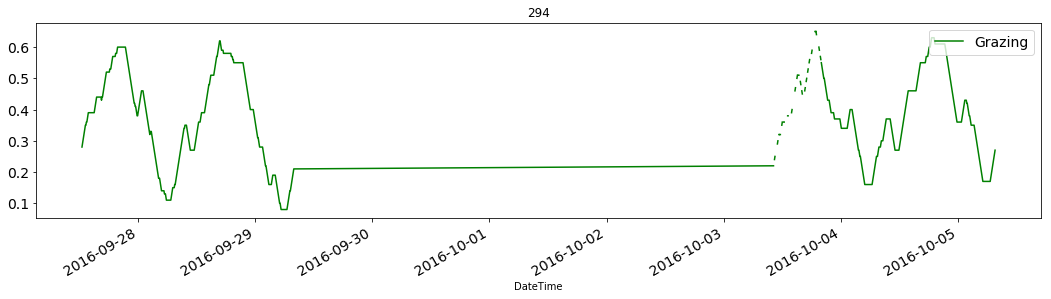

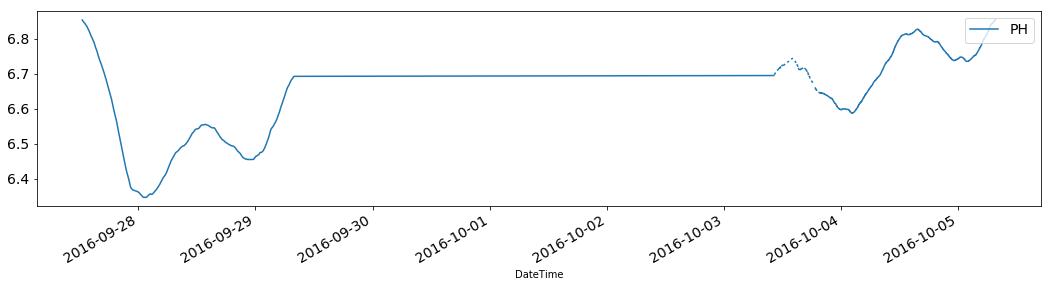

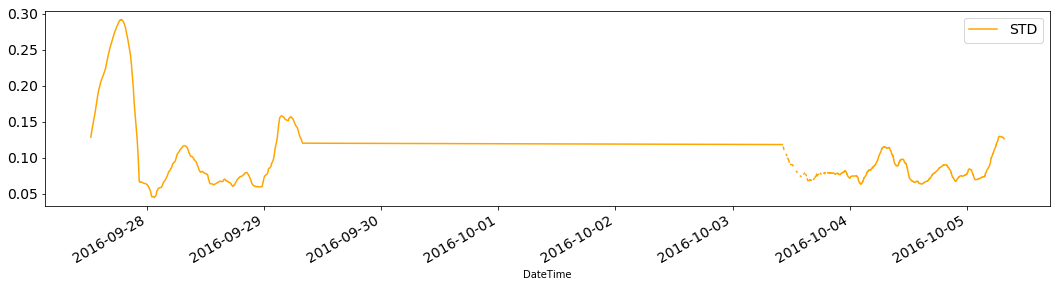

   
Time Difference between peak grazing activity and decrease in rumen PH
 
            MaxGrazing   Time_gz     MinpH   Time_ph            diff  \
Date                                                                   
2016-09-27        0.60  21:24:00  6.361953  23:54:00 0 days 00:00:00   
2016-09-28        0.62  16:48:00  6.345733  01:30:00 0 days 04:06:00   
2016-09-29        0.36  00:00:00  6.461948  00:00:00 0 days 07:12:00   
2016-10-03        0.65  18:54:00  6.597173  23:54:00 4 days 23:54:00   
2016-10-04        0.63  19:06:00  6.586595  02:18:00 0 days 07:24:00   
2016-10-05        0.43  01:42:00  6.734818  01:42:00 0 days 06:36:00   

            final_diff  
Date                    
2016-09-27         NaN  
2016-09-28         4.0  
2016-09-29         7.0  
2016-10-03         NaN  
2016-10-04         7.0  
2016-10-05         6.0  
 
*********************************************
Average hours between Grazing and decrease in PH:  6.0


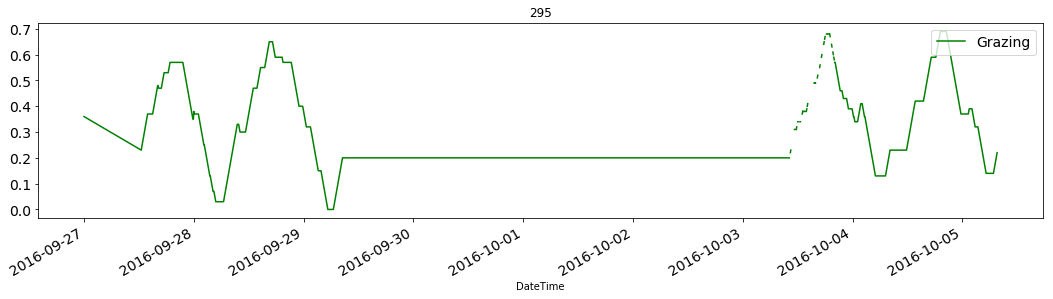

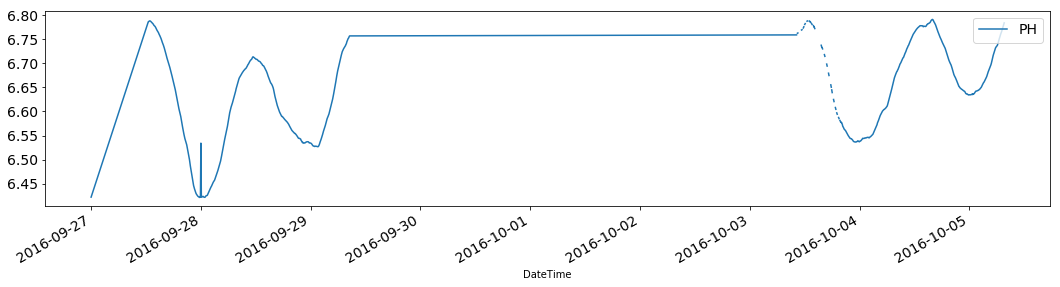

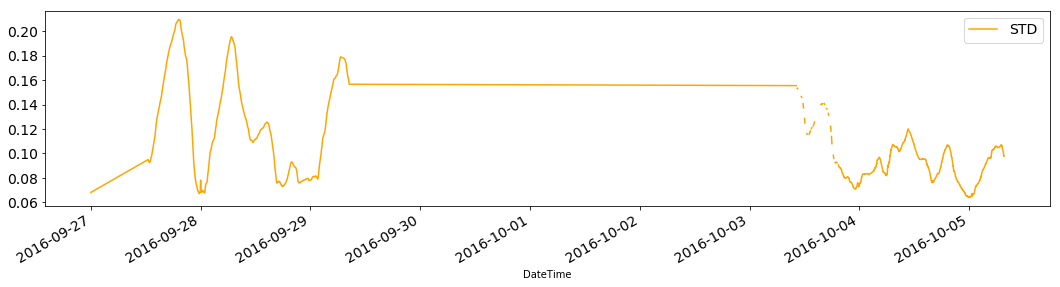

   
Time Difference between peak grazing activity and decrease in rumen PH
 
            MaxGrazing   Time_gz     MinpH   Time_ph            diff  \
Date                                                                   
2016-09-27        0.57  21:36:00  6.421688  23:42:00 0 days 00:00:00   
2016-09-28        0.65  17:12:00  6.422026  00:54:00 0 days 03:18:00   
2016-09-29        0.37  00:06:00  6.526777  01:36:00 0 days 08:24:00   
2016-10-03        0.68  19:00:00  6.536505  23:12:00 4 days 23:06:00   
2016-10-04        0.69  20:30:00  6.537669  00:00:00 0 days 05:00:00   
2016-10-05        0.39  02:06:00  6.634322  00:06:00 0 days 03:36:00   

            final_diff  
Date                    
2016-09-27         NaN  
2016-09-28         3.0  
2016-09-29         8.0  
2016-10-03         NaN  
2016-10-04         5.0  
2016-10-05         3.0  
 
*********************************************
Average hours between Grazing and decrease in PH:  4.75


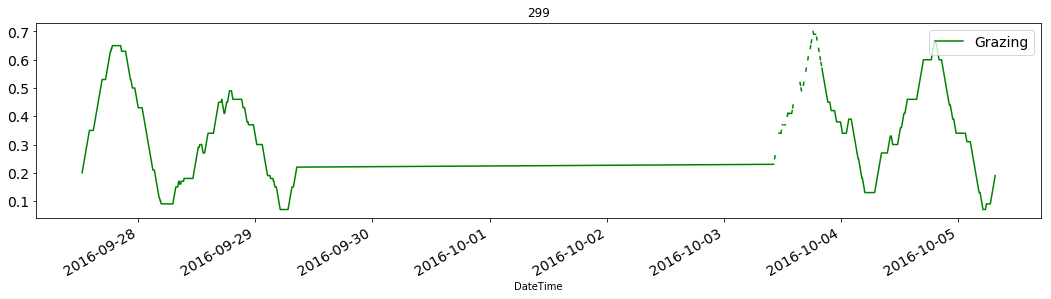

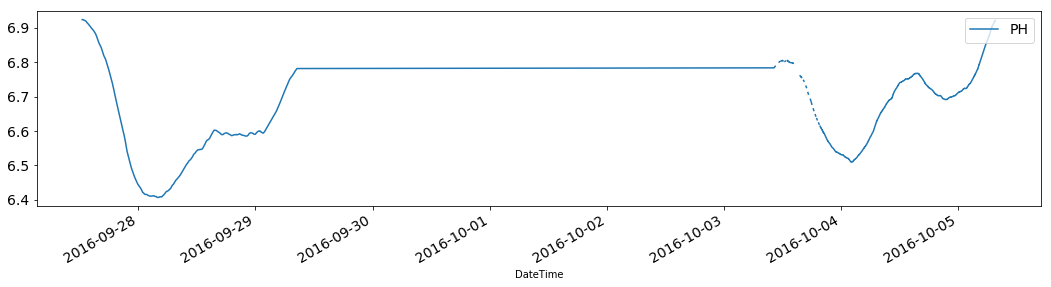

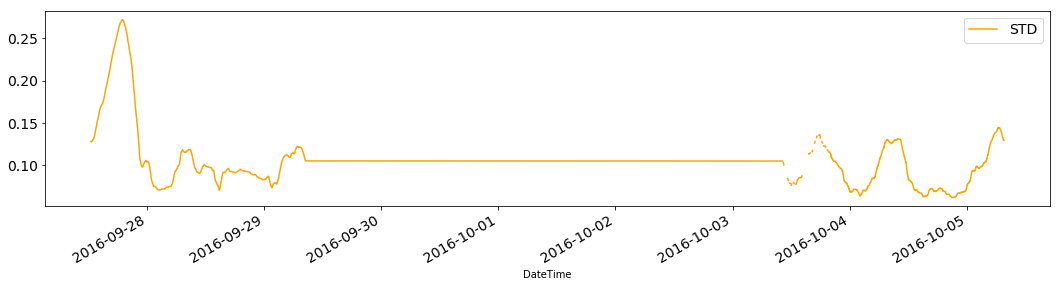

   
Time Difference between peak grazing activity and decrease in rumen PH
 
            MaxGrazing   Time_gz     MinpH   Time_ph            diff  \
Date                                                                   
2016-09-27        0.65  20:24:00  6.445407  23:54:00 0 days 00:00:00   
2016-09-28        0.49  19:06:00  6.406717  04:00:00 0 days 07:36:00   
2016-09-29        0.33  00:00:00  6.591163  00:00:00 0 days 04:54:00   
2016-10-03        0.70  18:18:00  6.532279  23:54:00 4 days 23:54:00   
2016-10-04        0.66  19:30:00  6.509670  02:06:00 0 days 07:48:00   
2016-10-05        0.34  01:30:00  6.711615  00:00:00 0 days 04:30:00   

            final_diff  
Date                    
2016-09-27         NaN  
2016-09-28         7.0  
2016-09-29         4.0  
2016-10-03         NaN  
2016-10-04         7.0  
2016-10-05         4.0  
 
*********************************************
Average hours between Grazing and decrease in PH:  5.5


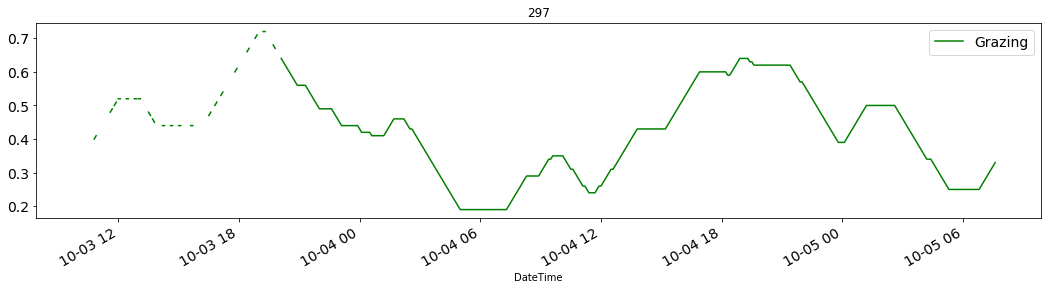

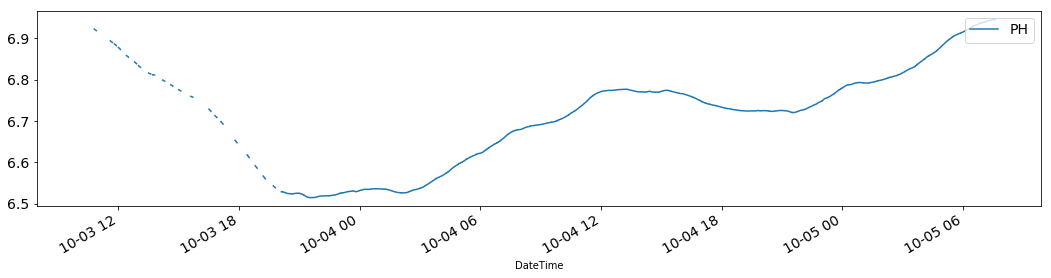

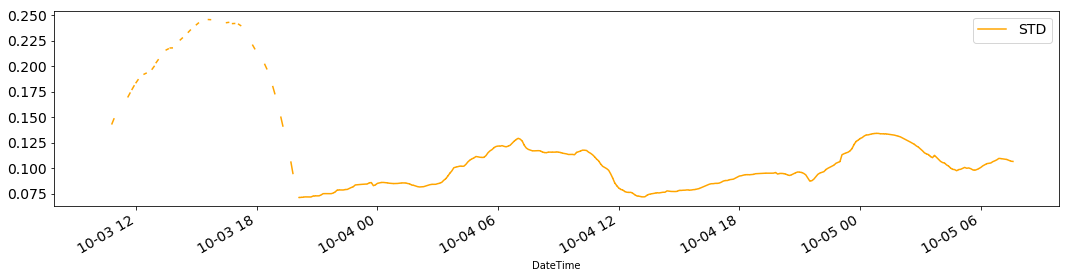

   
Time Difference between peak grazing activity and decrease in rumen PH
 
            MaxGrazing   Time_gz     MinpH   Time_ph     diff  final_diff
Date                                                                     
2016-10-03        0.72  19:18:00  6.515222  21:42:00 00:00:00         NaN
2016-10-04        0.64  19:18:00  6.526621  02:06:00 06:48:00         6.0
2016-10-05        0.50  02:36:00  6.780114  00:00:00 04:42:00         4.0
 
*********************************************
Average hours between Grazing and decrease in PH:  5.0


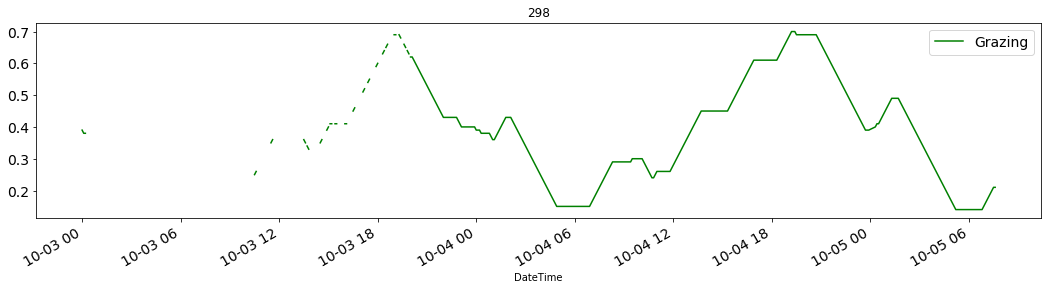

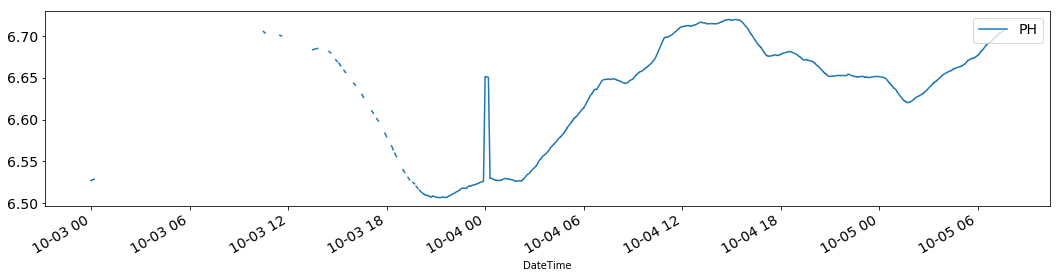

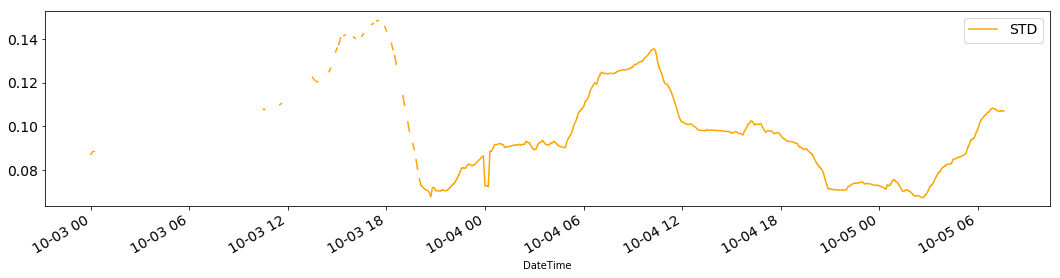

   
Time Difference between peak grazing activity and decrease in rumen PH
 
            MaxGrazing   Time_gz     MinpH   Time_ph     diff  final_diff
Date                                                                     
2016-10-03        0.69  19:18:00  6.506699  21:12:00 00:00:00         NaN
2016-10-04        0.70  19:24:00  6.526352  01:54:00 06:36:00         6.0
2016-10-05        0.49  01:42:00  6.620204  01:42:00 06:18:00         6.0
 
*********************************************
Average hours between Grazing and decrease in PH:  6.0


In [29]:
#run the function above to do all the window analysis, plotting and 
#time difference betweem peaks and troughs for each Animal ID

rolling_window(dat = temp_294, winsize = 100)
rolling_window(dat = temp_295, winsize = 100)
rolling_window(dat = temp_299, winsize = 100)
rolling_window(dat = temp_297, winsize = 100)
rolling_window(dat = temp_298, winsize = 100)

The tables above show when max grazing in a day happend and when PH reached to minimum. The way these data should be interpreted is that for example on 2016-09-27 (first table) the animal had maximum grazing activity around 21 pm. To look at ph, we should look at the day after. So on 2016-09-28 (second table) at around 1 AM (a bit after midnight) the PH was at minimum. There is a 4 hours time difference in this case. 

The time difference between grazing and reduction in PH can be calculated for other dates in the same manner. However, for the last days of each recording period i.e. 2016-09-29 and 2016-10-05, there will be no data from the next day so we won't be able to know when the decrease in PH happened for those boundary days.

In [21]:
results = pd.concat([pd.DataFrame(animal_id), pd.DataFrame(mean_timeDiff)], axis=1)
results.columns = ['Animal_ID','AvgTimeDiff (hrs)']
results

,Animal_ID,AvgTimeDiff (hrs)
0,294,6.00
1,295,4.75
2,299,5.50
3,297,5.00
4,298,6.00


The range in the time that takes the PH to go down after animal eats is from 4.75 hrs to 6 hrs based on data from the animals in this study. However, looking at std plots above (orange graphs), the variation in the mean of windows in some animals are greater than others. Animal 294 has a more complete and more stable data compared to other animals, so the time difference might be closer to 6 hours.

# Conclusions
 
 From the results we have seen so far we can make the following conclusion:
 
 1- Grazing decreases the PH of rumen
 <br>
 2- It takes about 5-6 hours for the PH to decrease after grazing.
 

# Other questions/discussions:

1- What is the time difference between the peaks of grazing and how many observations between them?

2- Does the pattern we saw here follow cattle biology and eating behaviour, eating time, etc.? 

3- Does the day light and lenght of day during data collection affect the results in different regions of the world? 
These animals were in wisconsin when the data were collected. We can look up the day lenght and sunrise/sunset time in September/October of 2016 to better understand when in the day the cattle starts or stops eating. This is because the window lenghts are 10 hours and the rolling average has been used. The actual time of eating might be any where in this window.


In [22]:
#This section is to be completed
#write a function to loop over all 5 animals 
#(To be comepletd for good coding practice)


## Expanding Window Function (To be completed)
- Calculate metrics for periods up to most current date
<br>
- New time series reflects all historical values
<br>
- Useful for running rate of return, running min/max 

Other methods to test: Convolutional Neural Network, Recurrent Nueral net?

In [24]:
#roll.shape

In [ ]:
roll.head()

In [ ]:
roll

In [ ]:
temp_295.head()

In [ ]:
temp_295[temp_295['Date'] == '2016-09-28']

In [ ]:
temp_295.dtypes